[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/01_population_single_1/logistic_continuous.ipynb)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Define a function to compute analytical solution to the logistic
# equation at different growth rates and carrying capacities
def y(t, N0, r=0.5, K=10.):
    """Calculate the analytical solution to the logistic equation

    Args:
        t (numpy.ndarray): time
        N0 (numpy.float64): initial population (unit: # of animals)
        r (float): growth rate (unit 1/time)
        K (float): carrying capacity (unit: # of animals)

    Returns:
        numpy.ndarray: analytical solution to the logistic equation
    """

    N = K / (1. - ((N0-K)/N0) * np.exp(-r*t) )

    return N

In [13]:
# Define variables (only vary the initial conditions)
t = np.linspace(0,10,101)              # 101 points in time spanning [0, 10]
arr_N0 = 2. * np.arange(1,11)          # array of 10 initial conditions
r = 0.5                                # growth rate
K = 5.                                # carrying capacity

In [9]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

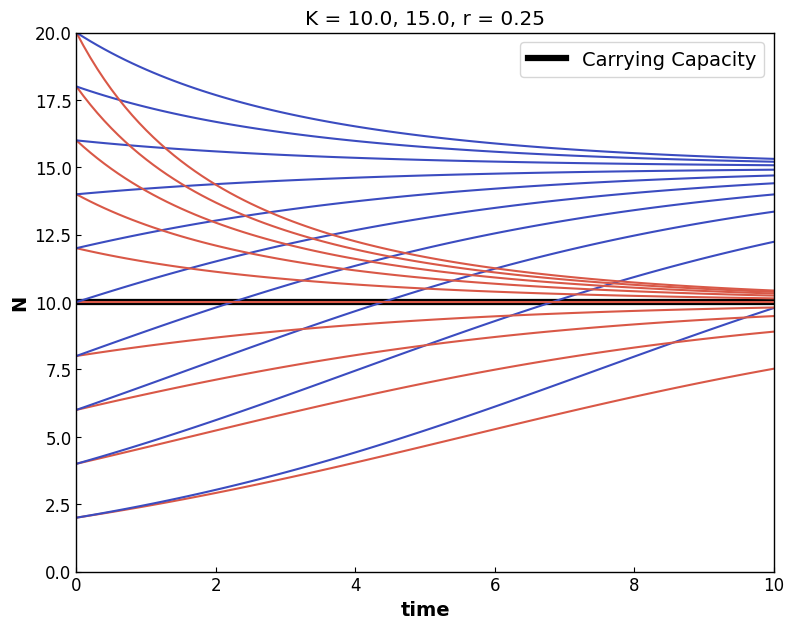

In [25]:
# Plot solutions for different initial population choices
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Create a color gradient for plotting all solutions
# Check out more colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
n = len(arr_N0) # number of solutions
colors = plt.cm.coolwarm(np.linspace(0.,1.,n))

# Loop over initial conditions and plot each solution
for idx, n0 in enumerate(arr_N0):
    ax.plot(t, y(t, n0, r=r, K=K), linewidth=1.5, color=colors[8])
    ax.plot(t, y(t, n0, r=r, K=K+5), linewidth=1.5, color=colors[0])


# Plot the carrying capacity as a reference
# zorder set the line to be at the bottom of this figure
ax.plot([t.min(), t.max()], [K, K], color='k', linewidth=4.5, label='Carrying Capacity', zorder=0)

# Set axes range
ax.set_xlim(0,10)
ax.set_ylim(0,20)

# Set axes labels and figure title
ax.set_xlabel('time')
ax.set_ylabel('N')
ax.set_title(f'K = {K}, {K+5}, r = {r}')
ax.legend(loc='upper right')

plt.show()

In [18]:
# Define variables (only vary the initial conditions)
t = np.linspace(0,10,101)              # 101 points in time spanning [0, 10]
arr_N0 = 2. * np.arange(1,11)          # array of 10 initial conditions
r = 0.25                                # growth rate
K = 10.                                # carrying capacity

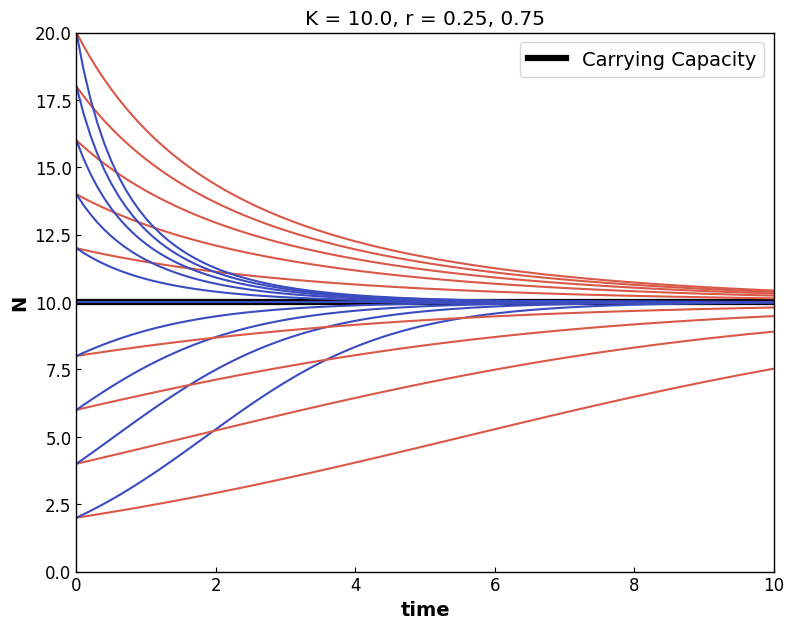

In [24]:
# Plot solutions for different initial population choices
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Create a color gradient for plotting all solutions
# Check out more colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
n = len(arr_N0) # number of solutions
colors = plt.cm.coolwarm(np.linspace(0.,1.,n))

# Loop over initial conditions and plot each solution
for idx, n0 in enumerate(arr_N0):
    ax.plot(t, y(t, n0, r=r, K=K), linewidth=1.5, color=colors[8])
    ax.plot(t, y(t, n0, r=r+0.5, K=K), linewidth=1.5, color=colors[0])


# Plot the carrying capacity as a reference
# zorder set the line to be at the bottom of this figure
ax.plot([t.min(), t.max()], [K, K], color='k', linewidth=4.5, label='Carrying Capacity', zorder=0)

# Set axes range
ax.set_xlim(0,10)
ax.set_ylim(0,20)

# Set axes labels and figure title
ax.set_xlabel('time')
ax.set_ylabel('N')
ax.set_title(f'K = {K}, r = {r}, {r+0.5}')
ax.legend(loc='upper right')

plt.show()

# New Section

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import ode



In [3]:
# Creating a function equivalent to ode45 in Matlab
def ode45(f,tint,y0,rtol=1e-9):
    r = ode(f).set_integrator('zvode', method='bdf',rtol=rtol)
    r.set_initial_value(y0, tint[0])
    dt=(tint[1]-tint[0])/10000
    t1 = tint[1]
    tt=[]
    rr=[]
    while r.successful() and r.t < t1:
        tt.append(r.t+dt)
        rr.append(np.real(r.integrate(r.t+dt)))
    return tt,rr

In [7]:
# An example illustrating the definition
# of a function for use in ode45
def ode_function():

    y0=1;
    r= 0.5;
    K = 10

    [t,y]=ode45(lambda t,y: f(t,y, y0 ,r, K),[0,5],y0);
    plt.plot(t,y,'-o')
    plt.xlabel('t');plt.ylabel('y')

def f(t,y, N0, r, K):
    N = K / (1. - ((N0-K)/N0) * np.exp(-r*t) )

    return N

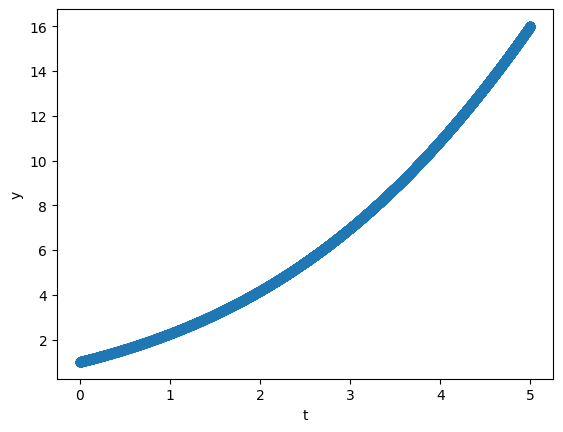

In [8]:
ode_function()